## Capstone 2 A look at the potential contribution of rooftop solar to Electricity Demand 

Solar power is one of the fastest growing methods of electricity generation--- citation needed 
with the increased used of renewables comes the challenge of updating the electrical grid to support this diverse supply of power. One of the largest criticizims of solar power is that it's supply of electricity doenst follow demand. This can create commplications in that electric markets in that supply needs to precicly follow demand for electricity to prevent brown outs black outs and power surges all of which can be. One argument is that nations will need to add more electic storage to the grid in the form of large batteries and super capacitors. 


the purpose of this paper is to find the point in which excess electricity generated by roof top solar will need to be stored 

Notes
https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/ 

https://machinelearningmastery.com/time-series-seasonality-with-python/

https://www.youtube.com/watch?v=_ZEWDGpM-vM

jake vanderplas video
https://www.youtube.com/watch?v=yUNBVzQfugg

Video on prophet algorithm
https://blog.exploratory.io/an-introduction-to-time-series-forecasting-with-prophet-package-in-exploratory-129ed0c12112

paper on power forcasting 
https://www.sciencedirect.com/science/article/abs/pii/S0360544218319297

itertool

https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b



p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.

In [3]:
import time
import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly

import scipy.stats as stats
import sklearn
import os
import warnings 
#from fbprophet import Prophet 


pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

warnings.filterwarnings('ignore')



#start_time = time.time()
#main()
#
#print("--- %s seconds ---" % (time.time() - start_time))

In [4]:
#import Deep Solar Dataset 
power = pd.read_csv('pjm_hourly_est.csv')
#power = pd.read_csv('pjm_hourly_est.csv', index_col = 'Datetime')

#power.index.to_datetime()
power.head(100)


Datetime  AEP  COMED  DAYTON  DEOK  DOM  DUQ  EKPC  FE  NI  PJME  PJMW  PJM_Load
0   1998-12-31 01:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   29309.0
1   1998-12-31 02:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   28236.0
2   1998-12-31 03:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   27692.0
3   1998-12-31 04:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   27596.0
4   1998-12-31 05:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   27888.0
5   1998-12-31 06:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   29382.0
6   1998-12-31 07:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   31373.0
7   1998-12-31 08:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   33272.0
8   1998-12-31 09:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   34133.0
9   1998-12-31 10:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   35232.0
10  1998-12-31 11:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   35401.0
11  1998-12-31 12:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   35331.0
12  1998-12-31 13:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   34582.0
13  1998-12-31 14:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   33767.0
14  1998-12-31 15:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   33026.0
15  1998-12-31 16:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   32620.0
16  1998-12-31 17:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   33741.0
17  1998-12-31 18:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   36510.0
18  1998-12-31 19:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   36783.0
19  1998-12-31 20:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   35482.0
20  1998-12-31 21:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   34305.0
21  1998-12-31 22:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   33277.0
22  1998-12-31 23:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   32068.0
23  1999-01-01 00:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   30824.0
24  1998-12-30 01:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   25013.0
25  1998-12-30 02:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   23917.0
26  1998-12-30 03:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   23327.0
27  1998-12-30 04:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   23286.0
28  1998-12-30 05:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   23723.0
29  1998-12-30 06:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   25444.0
30  1998-12-30 07:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   28235.0
31  1998-12-30 08:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   30483.0
32  1998-12-30 09:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   32825.0
33  1998-12-30 10:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   34090.0
34  1998-12-30 11:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   34870.0
35  1998-12-30 12:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   34921.0
36  1998-12-30 13:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   34480.0
37  1998-12-30 14:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   34041.0
38  1998-12-30 15:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   33711.0
39  1998-12-30 16:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN   NaN   33567.0
40  1998-12-30 17:00:00  NaN    NaN     NaN   NaN  NaN  NaN   NaN NaN NaN   NaN

In [5]:
power.index.max()

178261

In [6]:
start_date = '2014-01-01 00:00:00'
end_date = '2017-12-31 00:00:00'


power['Datetime'] = pd.to_datetime(power['Datetime'])

mask = (power['Datetime'] > start_date) & (power['Datetime'] <= end_date)

power = power.loc[mask]

power = power.set_index('Datetime')
#power.DateTimeIndex
power = power.fillna(0)
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2014-12-31 01:00:00 to 2017-01-02 00:00:00
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   AEP       35040 non-null  float64
 1   COMED     35040 non-null  float64
 2   DAYTON    35040 non-null  float64
 3   DEOK      35040 non-null  float64
 4   DOM       35040 non-null  float64
 5   DUQ       35040 non-null  float64
 6   EKPC      35040 non-null  float64
 7   FE        35040 non-null  float64
 8   NI        35040 non-null  float64
 9   PJME      35040 non-null  float64
 10  PJMW      35040 non-null  float64
 11  PJM_Load  35040 non-null  float64
dtypes: float64(12)
memory usage: 3.5 MB


In [13]:
#check the power dataframe for null and missing values 
missingpowerdates = pd.date_range(start = power.first_valid_index(), end = power.last_valid_index() ).difference(power.index)
null_powerdates = power['PJME'].loc[power.PJME.isnull() == True].count()
print(missingpowerdates)
print('the number of missing dates is {}'.format(len(missingpowerdates)))
print('the number of null values is {}'.format(null_powerdates))

null_pivoted = power.pivot_table('PJME', index =power.index.date,columns =power.index.time )
null_pivoted.count()
# below in the index we can see that there are several missing values between midnight and 4am
#this is due to daylight savings time

DatetimeIndex([], dtype='datetime64[ns]', freq=None)
the number of missing dates is 0
the number of null values is 0


00:00:00    1460
01:00:00    1460
02:00:00    1460
03:00:00    1456
04:00:00    1460
05:00:00    1460
06:00:00    1460
07:00:00    1460
08:00:00    1460
09:00:00    1460
10:00:00    1460
11:00:00    1460
12:00:00    1460
13:00:00    1460
14:00:00    1460
15:00:00    1460
16:00:00    1460
17:00:00    1460
18:00:00    1460
19:00:00    1460
20:00:00    1460
21:00:00    1460
22:00:00    1460
23:00:00    1460
dtype: int64

In [7]:
power['total'] = power[['AEP', 'COMED',
                     'DAYTON', 'DEOK',
                     'DOM', 'DUQ',
                     'EKPC', 'FE',
                     'NI', 'PJME',
                     'PJMW', 'PJM_Load']].sum(axis = 1)
power.head()




AEP    COMED  DAYTON    DEOK      DOM     DUQ    EKPC      FE   NI     PJME    PJMW  PJM_Load    total
Datetime                                                                                                                       
2014-12-31 01:00:00  15993.0  11633.0  1912.0  3067.0  12337.0  1562.0  1882.0  7547.0  0.0  30795.0  6088.0       0.0  92816.0
2014-12-31 02:00:00  15780.0  11139.0  1875.0  3024.0  12267.0  1550.0  1845.0  7334.0  0.0  29995.0  6010.0       0.0  90819.0
2014-12-31 03:00:00  15769.0  10871.0  1866.0  3021.0  12345.0  1545.0  1902.0  7196.0  0.0  29688.0  5991.0       0.0  90194.0
2014-12-31 04:00:00  15738.0  10735.0  1883.0  3031.0  12589.0  1546.0  1894.0  7153.0  0.0  29767.0  6051.0       0.0  90387.0
2014-12-31 05:00:00  15993.0  10714.0  1910.0  3111.0  13046.0  1539.0  1927.0  7305.0  0.0  30426.0  6177.0       0.0  92148.0

<Figure size 1440x1080 with 0 Axes>

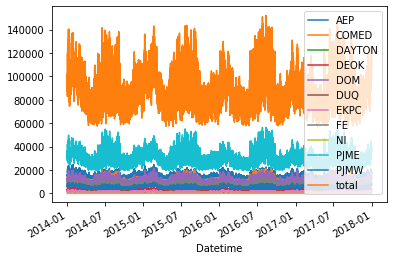

In [8]:
plt.figure(figsize=(20,15))

pd.plotting.register_matplotlib_converters()
power[[ 'AEP', 'COMED',
        'DAYTON', 'DEOK',
        'DOM', 'DUQ',
        'EKPC', 'FE',
        'NI', 'PJME',
        'PJMW', 'total']].plot();
#https://www.sciencedirect.com/science/article/abs/pii/S0360544218319297

#plt.plot(X,Y)

In [55]:
pivoted = power.pivot_table('AEP', index =power.index.time,columns = power.index.date)
pivoted.iloc[:5,:5]

2014-01-01  2014-01-02  2014-01-03  2014-01-04  2014-01-05
00:00:00         NaN     15201.0     18575.0     19496.0     16120.0
01:00:00     15441.0     14853.0     18181.0     18978.0     15602.0
02:00:00     15123.0     14822.0     18049.0     18703.0     15308.0
03:00:00     15001.0     14814.0     18134.0     18542.0     15037.0
04:00:00     15001.0     14955.0     18250.0     18525.0     14934.0

<Figure size 4320x2880 with 0 Axes>

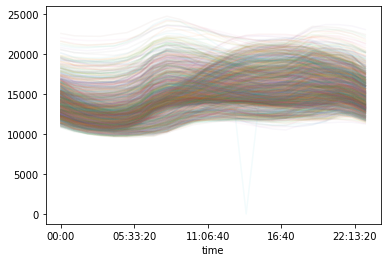

In [56]:
plt.figure(figsize = (60,40))
pivoted.plot(legend = False, alpha=0.05)

In [14]:
X = pivoted.fillna(0).T.values
X.shape

(1461, 24)

In [334]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

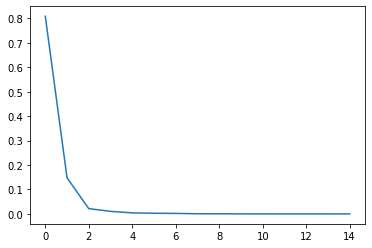

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [8.09201383e-01 1.47801468e-01 2.16872281e-02 1.04079565e-02
 4.35873765e-03 2.75496037e-03 2.03657897e-03 7.26761631e-04
 4.10148612e-04 2.66994273e-04 1.21841936e-04 9.48902024e-05
 4.11136469e-05 3.08626158e-05 1.73355057e-05]


 to retain 80.92% of total variance 1 components required
 to retain 95.7% of total variance 2 components required
 to retain 97.87% of total variance 3 components required
 to retain 98.91% of total variance 4 components required
0.999958260461026


In [335]:
# Dimensionality reduction 
# conduct principle compenent analysis on the data and examine the explained variance of the components

sklearn_pca = PCA(n_components=15)
Y_sklearn = sklearn_pca.fit_transform(X)

pca = sklearn_pca.fit_transform(X_std)

plt.plot(sklearn_pca.explained_variance_ratio_)

plt.show()

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

explained_variance = []
explained_variance = sklearn_pca.explained_variance_ratio_

total_variace = 0
total_variace = 0
components = 0
num_prints = 0
print('\n')
for v in explained_variance:
    total_variace+=v
    components +=1
    
    if total_variace>=0.5 and total_variace<0.7 and num_prints < 1 :
        print(" to retain {}% of total variance  {} components are required".format(round(100*total_variace,2),components))
        num_prints+=1
        
    if total_variace>=0.7 and total_variace<0.8 and num_prints < 2 :
        print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
        num_prints+=1
        
    elif total_variace>=0.8 and total_variace<0.9 and num_prints < 3 :
        print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
        num_prints+=1
        
    elif total_variace>=0.9 and num_prints < 4  :
        print(" to retain {}% of total variance {} components required".format(round(100*total_variace,2),components))
        num_prints+=1
        
    else:
        None
        
print(sum(explained_variance))


In [519]:
from sklearn.decomposition import PCA

X2=pd.DataFrame()
X2 = PCA(4,svd_solver='full').fit_transform(X_std)

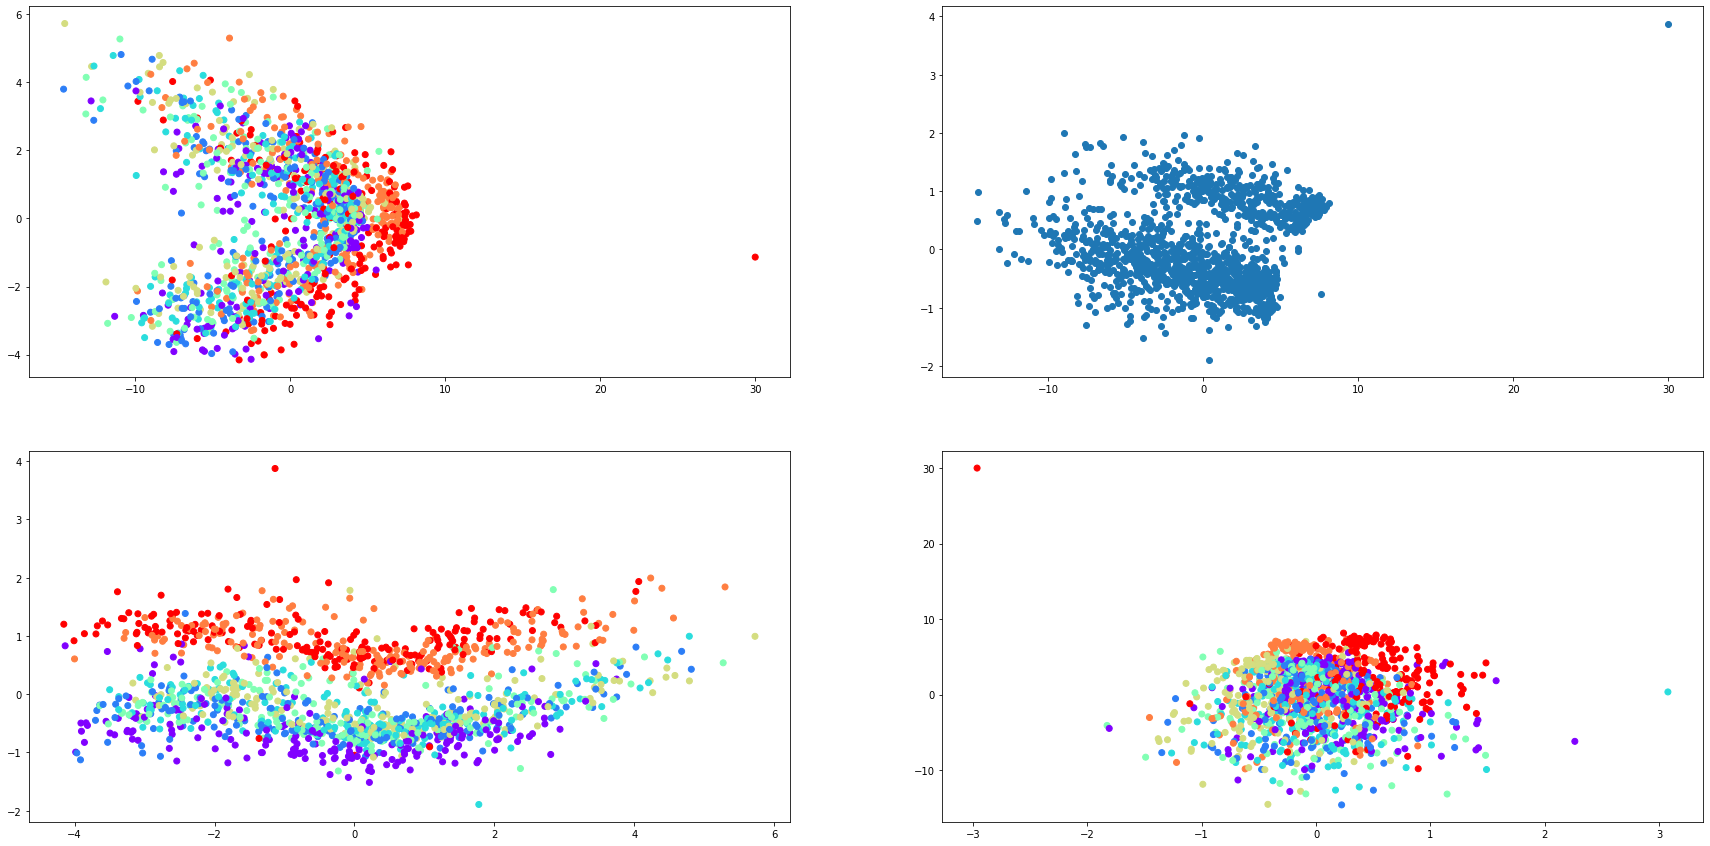

In [542]:
xplot = X2[:,0]
yplot = X2[:,1]
zplot = X2[:,2]
aplot = X2[:,3]

day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek
Month_of_Year = pd.DatetimeIndex(pivoted.columns).month

plt.figure(figsize=[30,15])
plt.subplot(2,2,1)
plt.scatter(xplot,yplot,c=day_of_week,cmap='rainbow')
plt.subplot(2,2,2)
plt.scatter(xplot,zplot)#,c=day_of_week,cmap='rainbow')
plt.subplot(2,2,3)
plt.scatter(yplot,zplot,c=day_of_week,cmap='rainbow')
plt.subplot(2,2,4)
plt.scatter(aplot,xplot,c=day_of_week,cmap='rainbow')



In [560]:
from sklearn.mixture import GaussianMixture
#gmm = GaussianMixture(3)
gmm = GaussianMixture(n_components=2,covariance_type ='tied', random_state=42)
scaler = StandardScaler()
X2_std = scaler.fit_transform(X2)
#gmm.fit(X2[:,(0,2)])
weekday_gausian_labels = gmm.fit_predict(X2_std[:,(1,2)])

day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek
Month_of_Year = pd.DatetimeIndex(pivoted.columns).month
print(day_of_week)

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6], dtype='int64', length=1461)


In [630]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import hdbscan


# Defining the k-means
kmeans_cluster = KMeans(n_clusters=2, random_state=34)

k_cluster_labels02 = kmeans_cluster.fit_predict(X2_std[:,(0,2)])

HDB_clusterer = hdbscan.HDBSCAN(min_cluster_size=45)#, gen_min_span_tree=True)

#dbscan_cluster = DBSCAN(eps=0.1, min_samples=0,metric='manhattan')
#dbscan_cluster.fit(X2[:,(1,2)])
dbscan_cluster_1 = HDB_clusterer.fit_predict(X2_std[:,(0,1,2)])

#unique(dbscan_cluster_1)

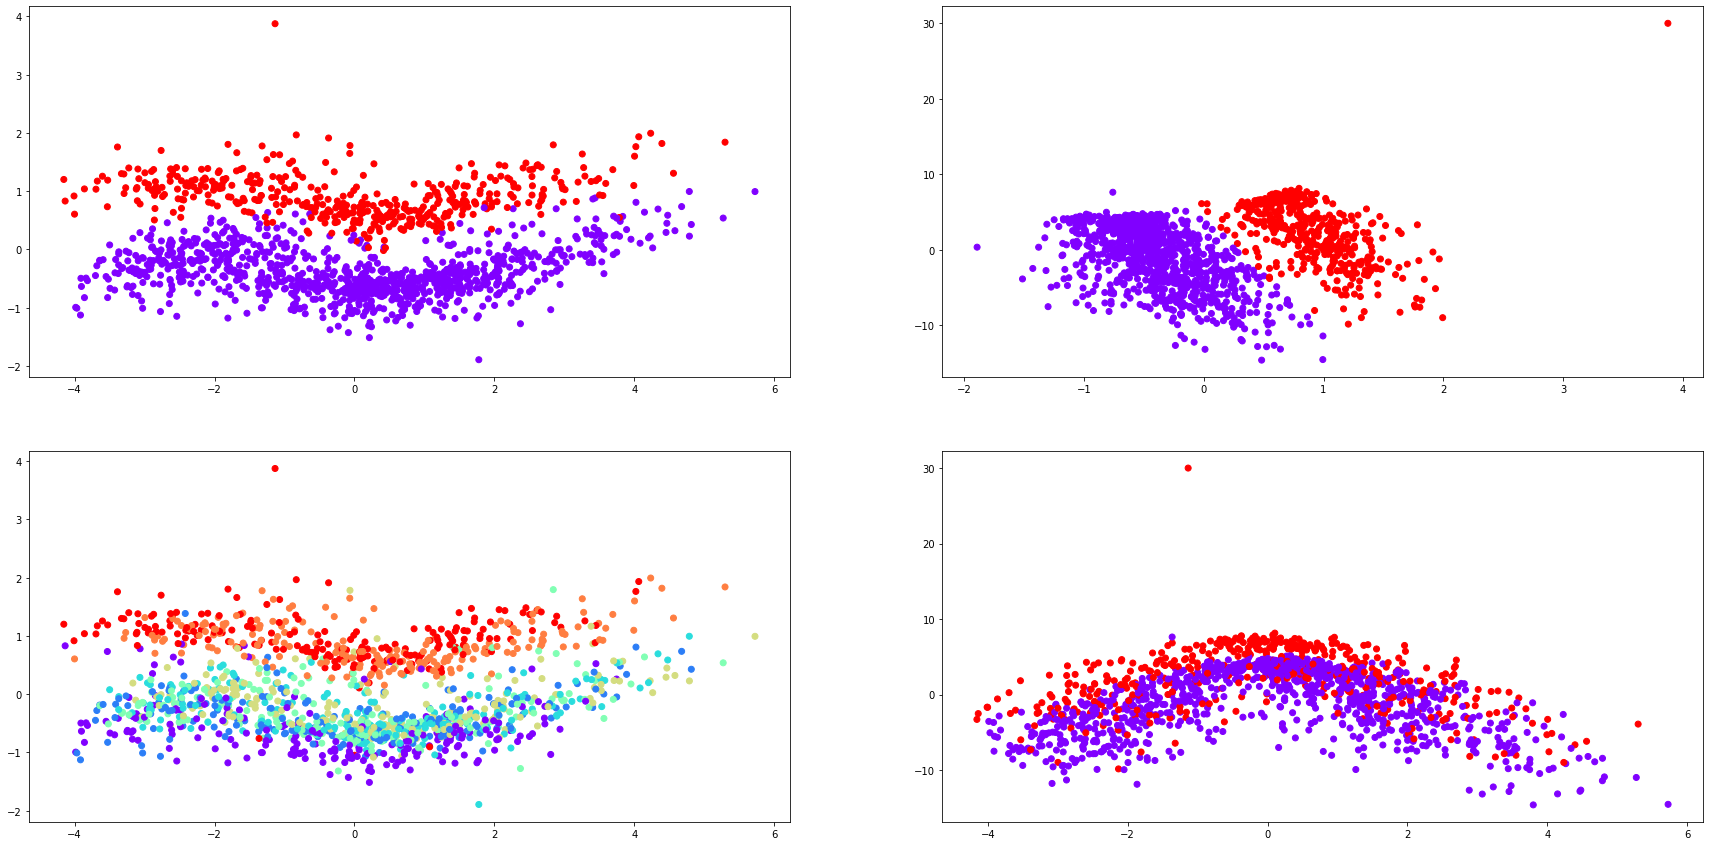

In [654]:
xplot = X2[:,1]
yplot = X2[:,2]
zplot = X2[:,0]
plt.figure(figsize=[30,15])
plt.subplot(2,2,1)
plt.scatter(xplot,yplot,c=k_cluster_labels02,cmap='rainbow')
plt.subplot(2,2,2)
plt.scatter(yplot,zplot,c=k_cluster_labels02,cmap='rainbow',)
plt.subplot(2,2,3)
plt.scatter(xplot,yplot,c=day_of_week,cmap='rainbow',)
plt.subplot(2,2,4)
plt.scatter(xplot,zplot,c=k_cluster_labels02,cmap='rainbow',)



In [689]:
#print(day_of_week == 0,k_cluster_labels02)
days = pd.DataFrame()
days = pivoted.fillna(0).T
days['weekday'] = day_of_week
days['clusters'] = k_cluster_labels02

days.loc[days['clusters'] ==0].loc[ days['weekday'] not in [0,1, 2, 3,4]].head()
#.loc[days['weekday'] !=6].head()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

here we where able to extract thanksgiving the fourth of july and memorial day

In [678]:
from sklearn.cluster import DBSCAN
import hdbscan
HDB_clusterer = hdbscan.HDBSCAN(min_cluster_size=1)#, gen_min_span_tree=True)

dbscan_cluster1 = DBSCAN(eps=.48, min_samples=60,metric='manhattan')
#dbscan_cluster.fit(X2[:,(0,2)])
cluster_1 = dbscan_cluster1.fit_predict(X2_std[:,(0,2)])

dbscan_cluster2 = DBSCAN(eps=0.7, min_samples=80,metric='manhattan')
cluster_2 = dbscan_cluster2.fit_predict(X2_std[:,(0,2)])


dbscan_cluster3 = DBSCAN(eps=.5, min_samples=70,metric='manhattan')
cluster_3 = dbscan_cluster3.fit_predict(X2_std[:,(0,2)])


dbscan_cluster4 = DBSCAN(eps=.48, min_samples=50,metric='manhattan')
cluster_4 = dbscan_cluster4.fit_predict(X2_std[:,(0,2)])

#unique(dbscan_cluster_1)

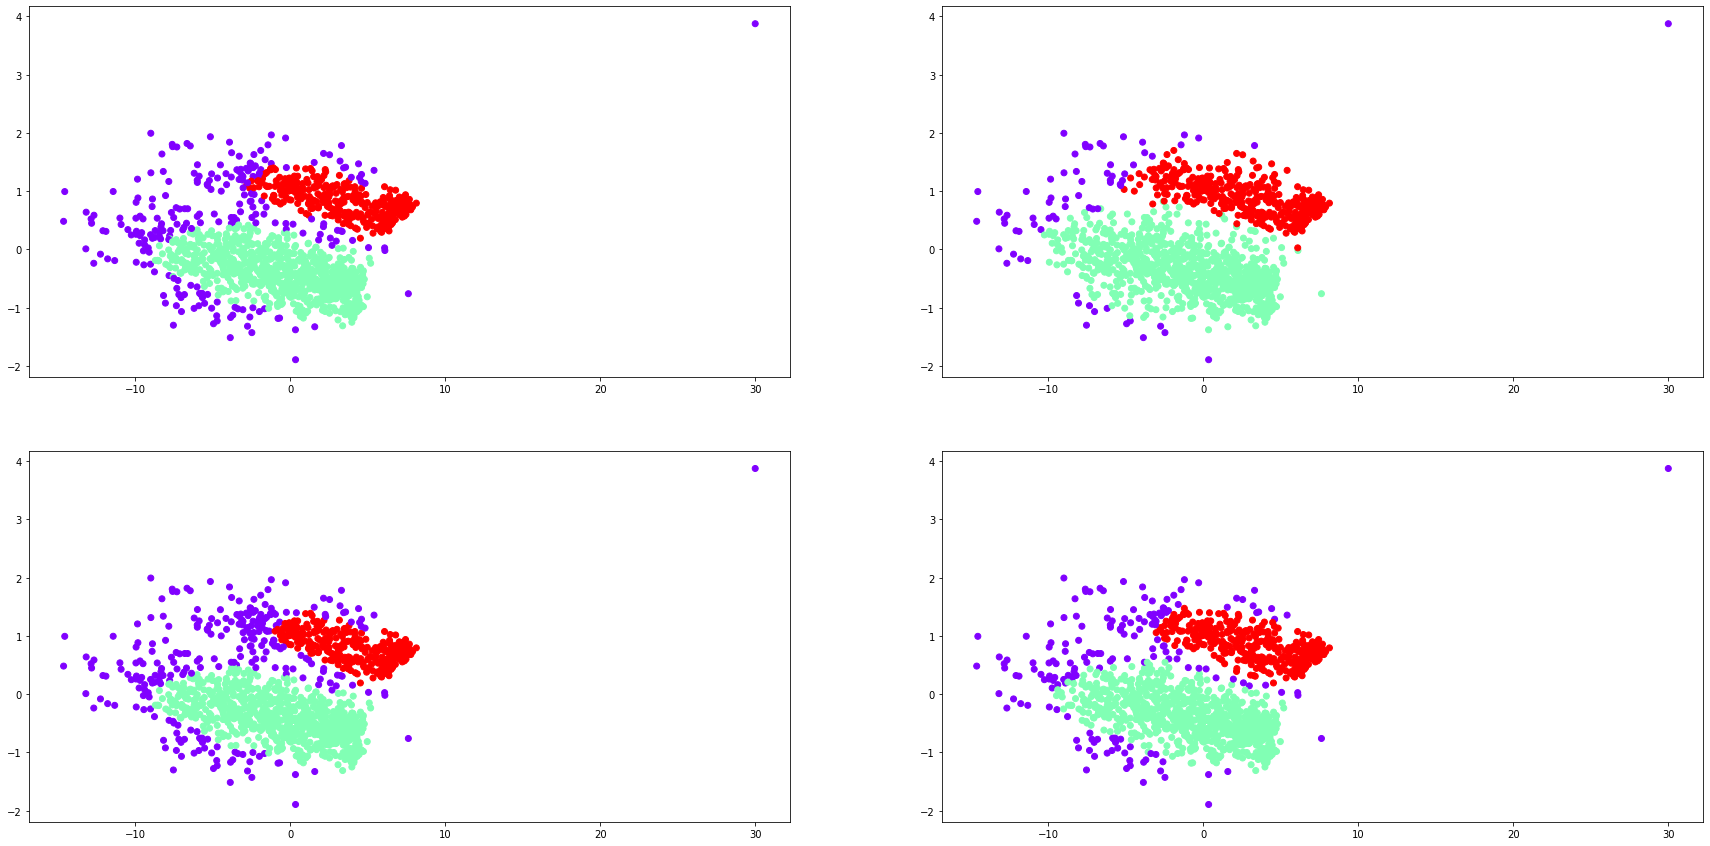

In [679]:
xplot = X2[:,0]
yplot = X2[:,2]
zplot = X2[:,0]
plt.figure(figsize=[30,15])
plt.subplot(2,2,1)
plt.scatter(xplot,yplot,c=cluster_1,cmap='rainbow')
plt.subplot(2,2,2)
plt.scatter(xplot,yplot,c=cluster_2,cmap='rainbow',)
plt.subplot(2,2,3)
plt.scatter(xplot,yplot,c=cluster_3,cmap='rainbow',)
plt.subplot(2,2,4)
plt.scatter(xplot,yplot,c=cluster_4,cmap='rainbow',)



###### 

In [50]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X2[:,0:2])
seasonal_cluster_labels = gmm.predict(X2[:,0:,2])


IndexError: too many indices for array

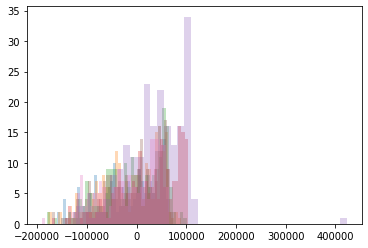

In [38]:

days_of_the_Week = day_of_week.unique().tolist()

for day in days_of_the_Week:
    plt.hist(X2[:,0][day_of_week == day],alpha = 0.3,bins = 40)

##ax = sns.kdeplot(X2[:,0], shade=True, color=day_of_week, cmap='rainbow')

#sns.pairplot(X2, hue=day_of_week)

In [106]:
#pivoted.T[labels == 0].T.plot(c=labels,cmap='rainbow',legend = False, alpha = 0.4)

plt.figure(figsize=[30,10])
plt.subplot(1,3,1)
plt.plot(pivoted,c=labels,cmap='cool',legend = False, alpha=0.05)
plt.subplot(1,3,2)
plt.plot(pivoted,c=labels,cmap='cool',legend = False, alpha=0.05)
plt.subplot(1,3,3)
plt.plot(pivoted,c=labels,cmap='cool',legend = False, alpha=0.05)

#pivoted.plot(c=Month_of_Year,cmap='cool',legend = False, alpha=0.05)


AttributeError: 'Line2D' object has no property 'cmap'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1180080e0> (for post_execute):


ValueError: microsecond must be in 0..999999

ValueError: microsecond must be in 0..999999

<Figure size 2160x720 with 1 Axes>

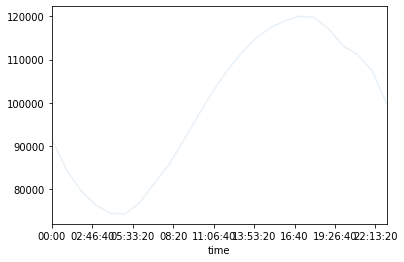

In [202]:
pivoted.T[Month_of_Year == 8].mean().T.plot(legend = False, alpha = 0.1)

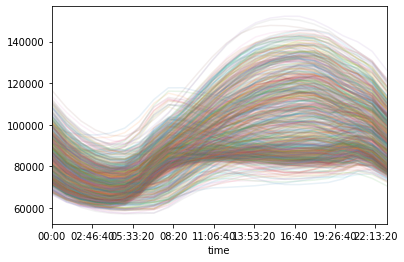

In [104]:
pivoted.T[labels == 1].T.plot(legend = False, alpha = 0.1)

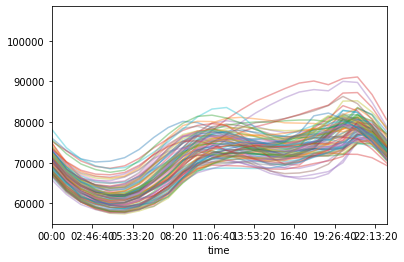

In [102]:
pivoted.T[labels == 2].T.plot(legend = False, alpha = 0.4)

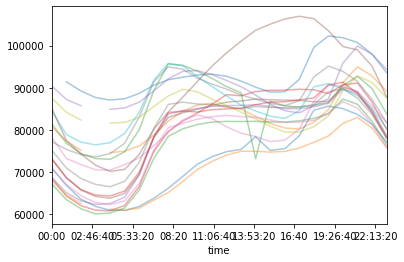

In [103]:
pivoted.T[labels == 3].T.plot(legend = False, alpha = 0.4)

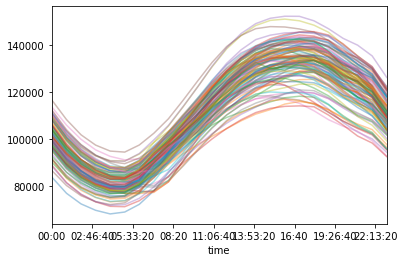

In [91]:
pivoted.T[labels == 4].T.plot(legend = False, alpha = 0.4)

In [48]:
day_of_week = pd.DatetimeIndex(pivoted.columns).dayofweek
print(day_of_week)

Int64Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
            ...
            4, 5, 6, 0, 1, 2, 3, 4, 5, 6], dtype='int64', length=1461)


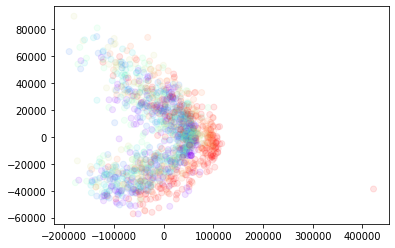

In [47]:
plt.scatter(X2[:,0],X2[:,1],c=day_of_week,cmap='rainbow',alpha= 0.1)

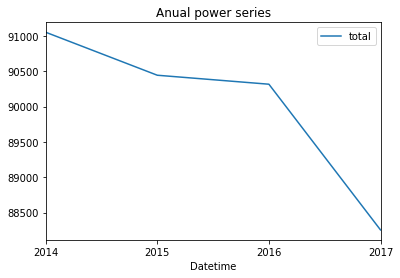

total
Datetime                
2014-12-31  91054.283822
2015-12-31  90445.134703
2016-12-31  90317.935109
2017-12-31  88253.457709

In [31]:
Annual_power=pd.DataFrame()

Annual_power['total'] = power['total'].resample('A').mean()
Annual_power.plot()
plt.title('Anual power series')
plt.show()
Annual_power.head()

In [ ]:
pivoted.T[labels == 0].T.plot(legend = False, alpha = 0.1)

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [103]:
print(168*52*4)
print(168*52)
print(365.25/7)
print(168*52.1428571429)
print(168*52.17857142857143)

34944
8736
52.17857142857143
8760.0000000072
8766.0


In [104]:
train = power['total']
result = seasonal_decompose(train,model = 'additive', freq = (8766))
result

In [105]:
print(result.trend)

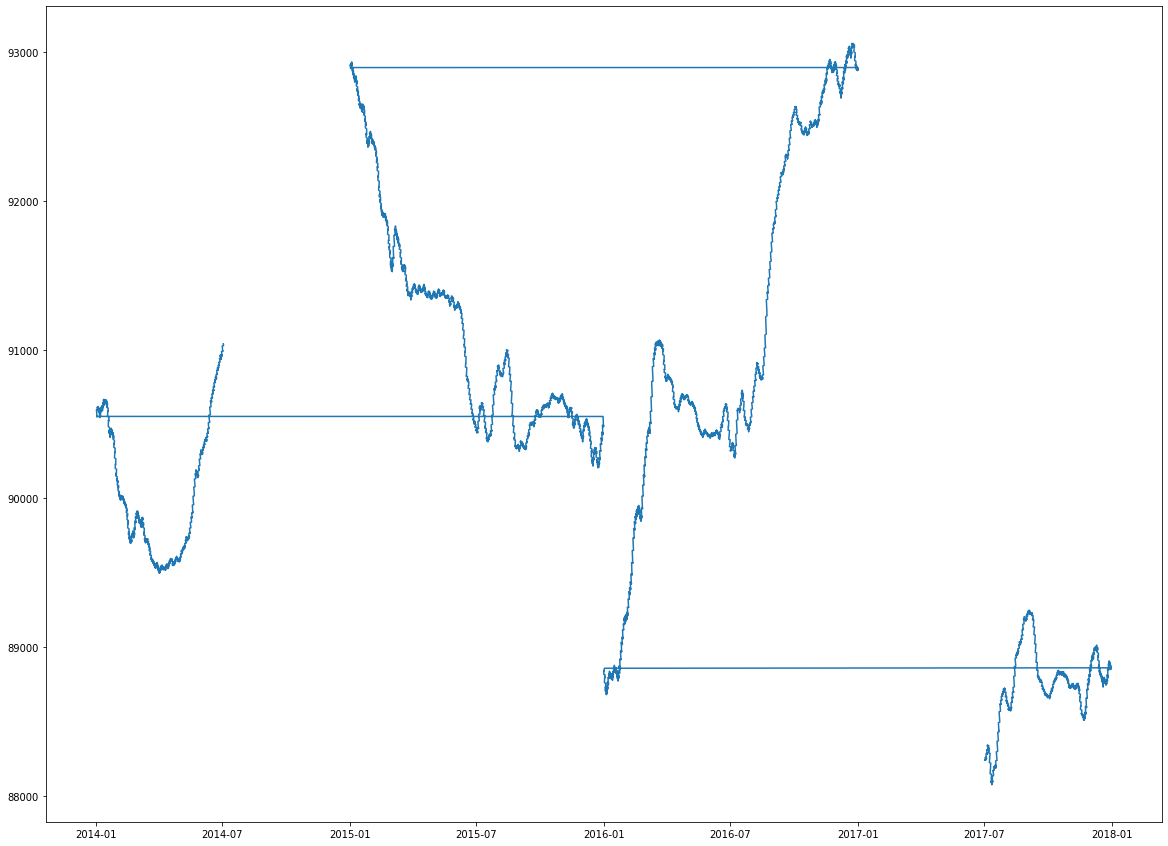

In [106]:
plt.figure(figsize=(20,15))

plt.plot(,result.trend)

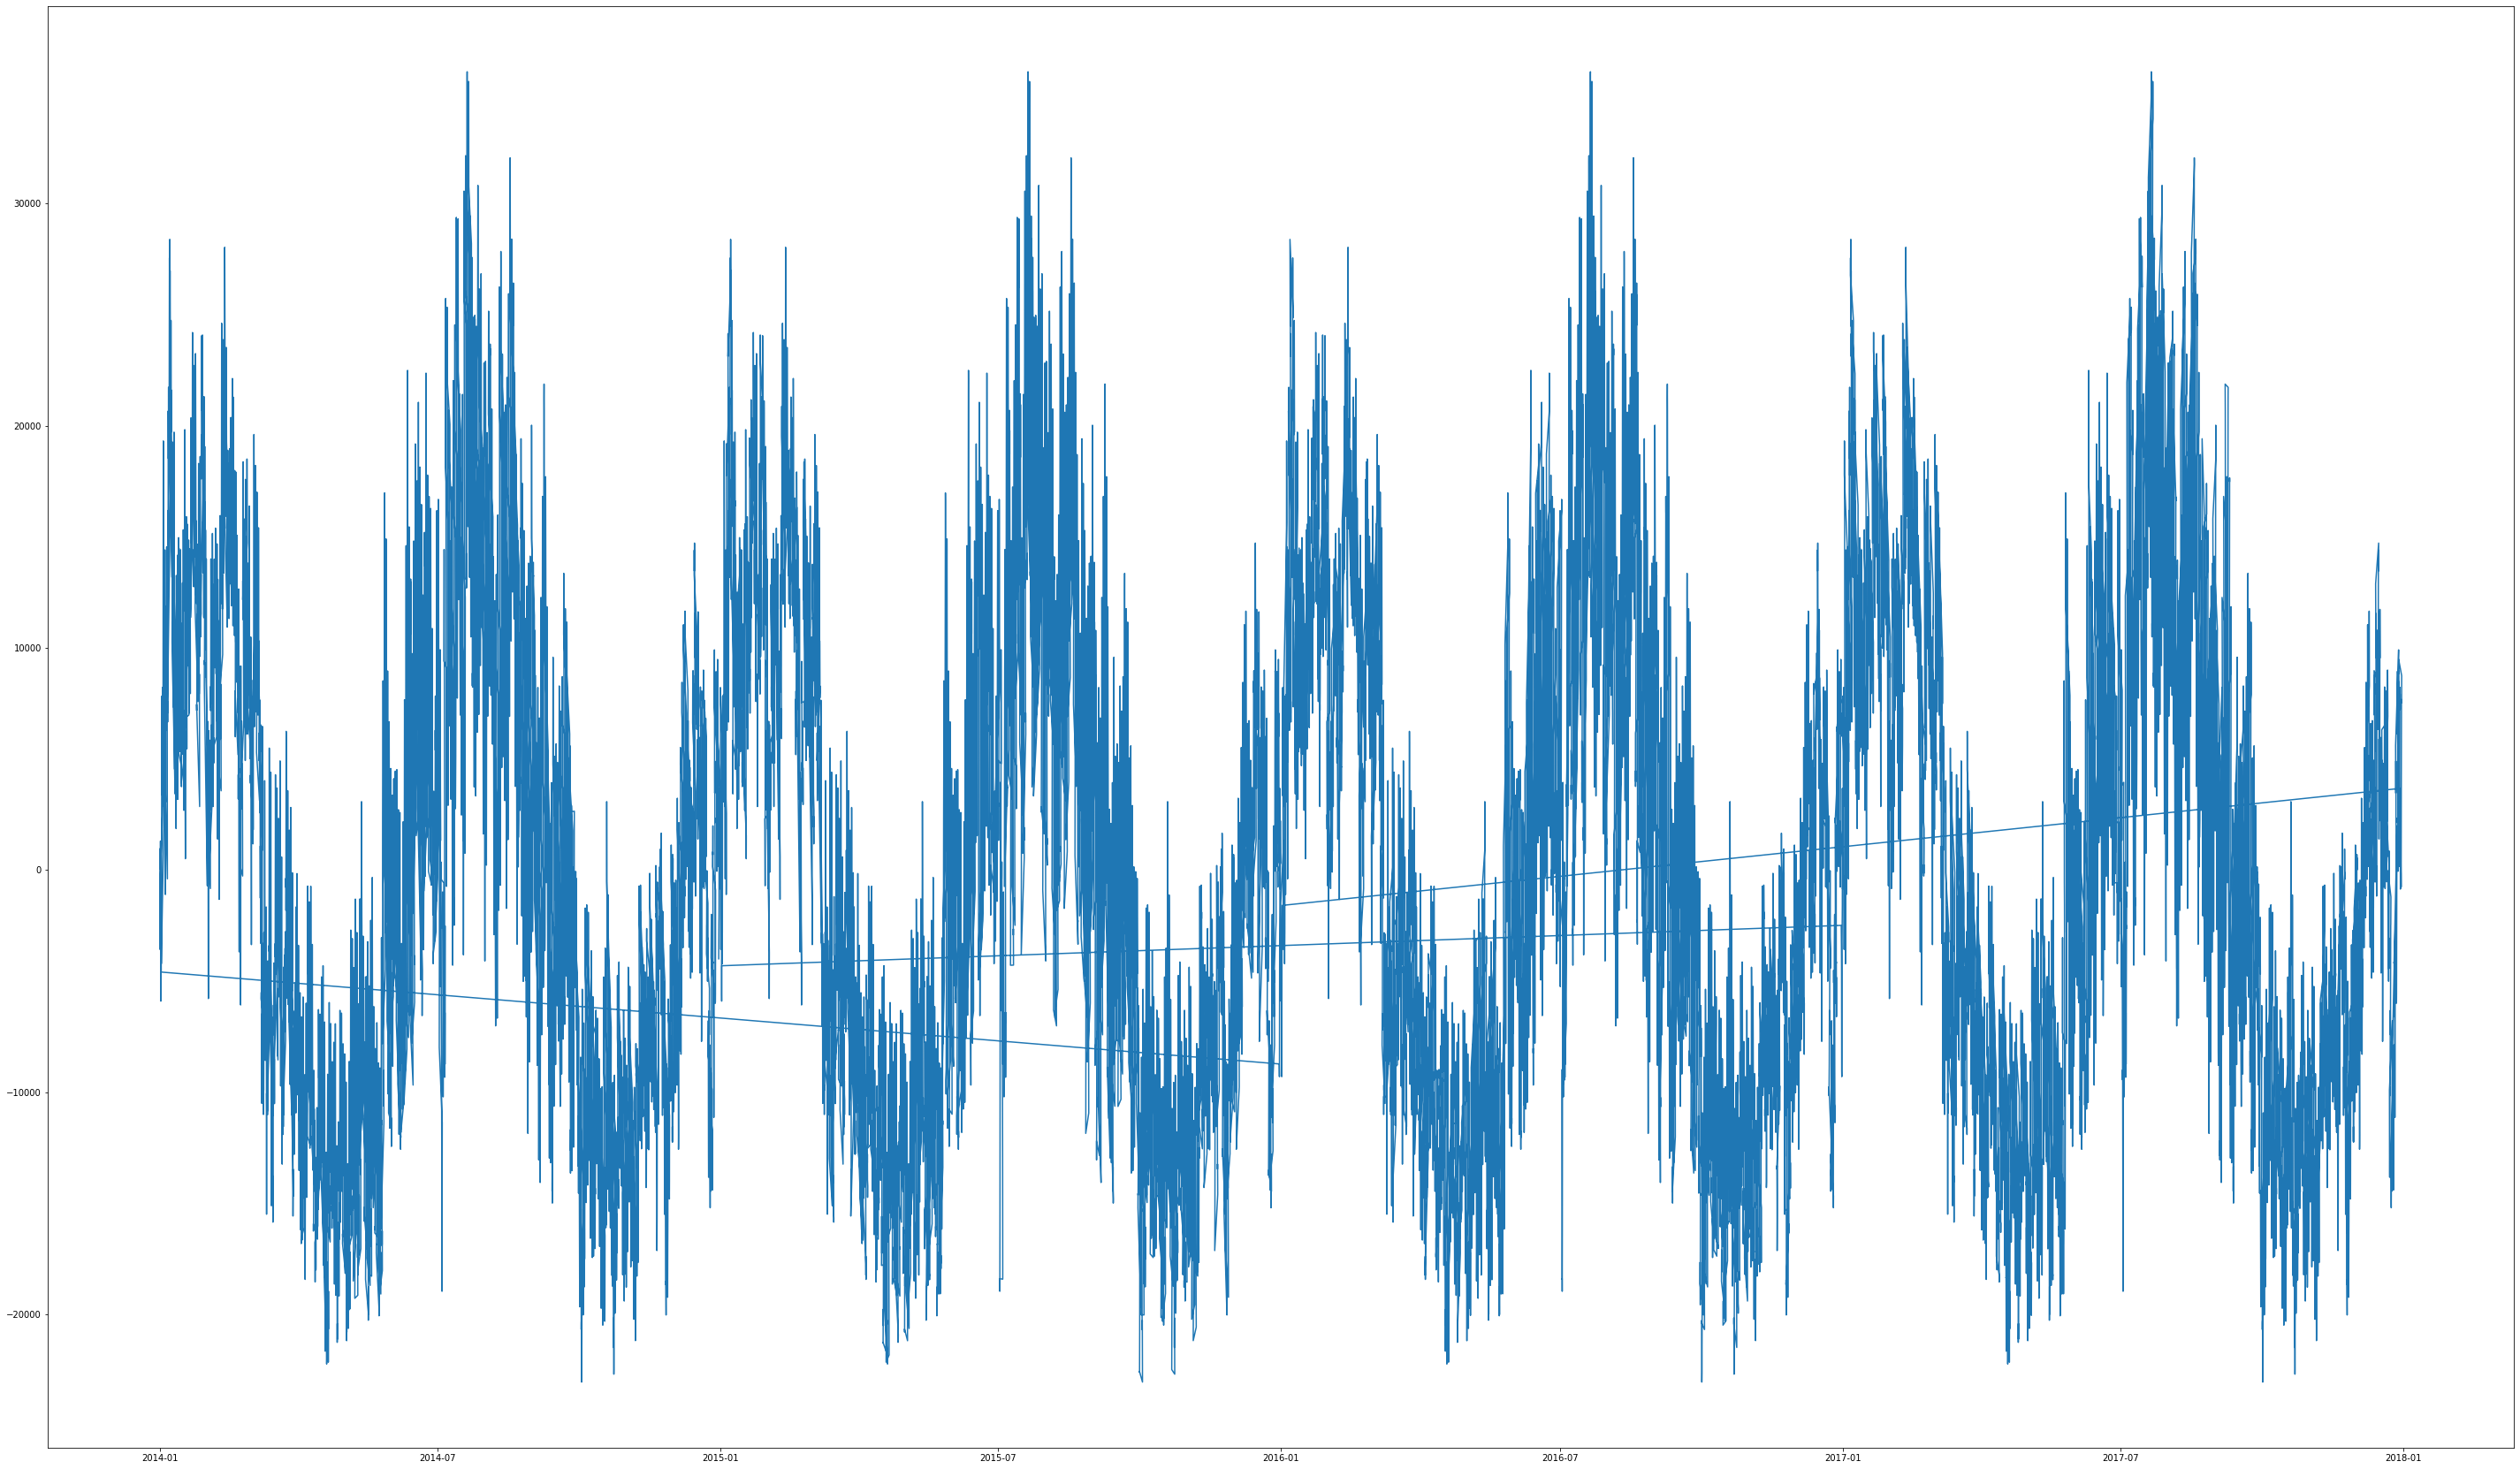

In [107]:
plt.figure(figsize=(50,30))
plt.plot(result.seasonal)

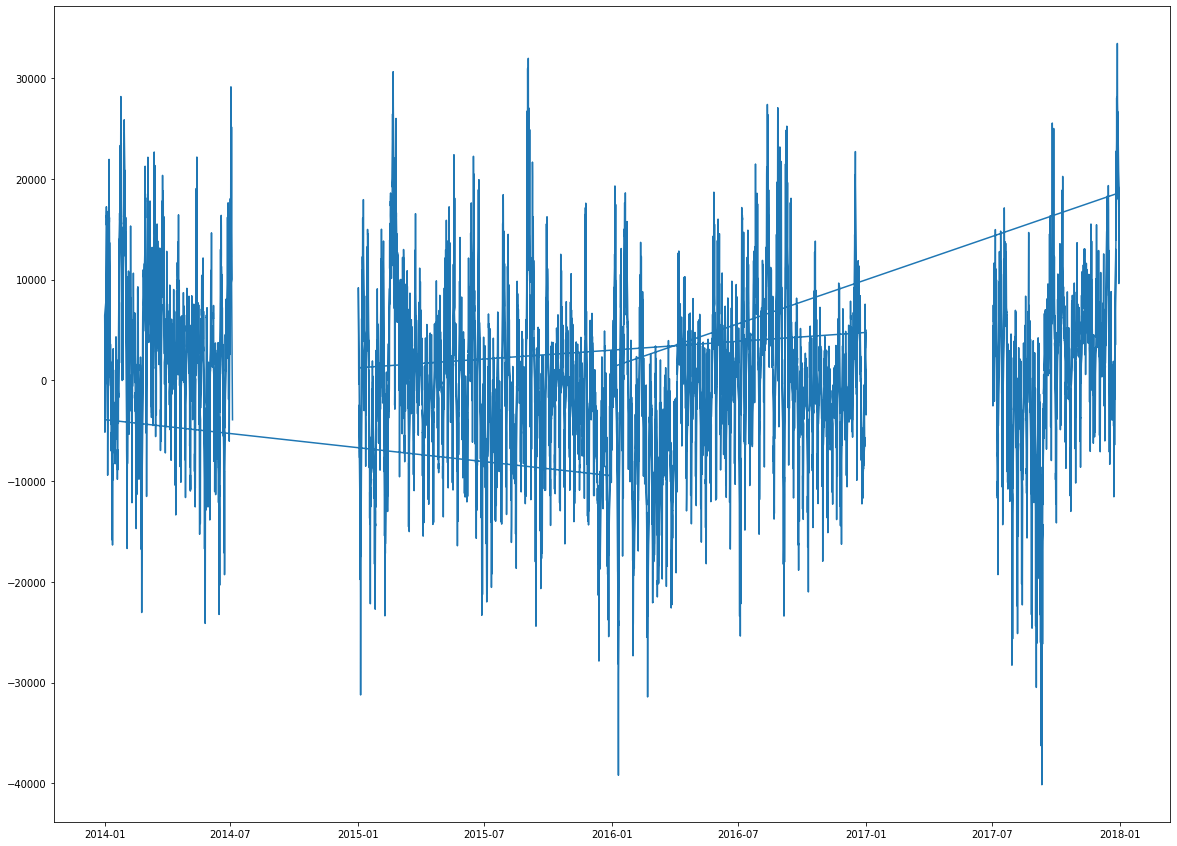

In [100]:
plt.figure(figsize=(20,15))
plt.plot(result.resid)

In [ ]:
Monthly_power=pd.DataFrame()

Monthly_power['total'] = power['total'].resample('M').mean()
Annual_power.plot()
plt.title('Monthly power series')
plt.show()
Monthly_power.head()

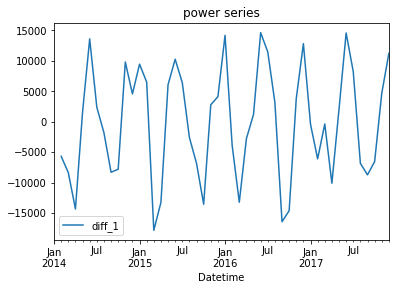

total        diff_1
Datetime                               
2014-01-31  107431.192463           NaN
2014-02-28  101719.750000  -5711.442463
2014-03-31   93340.139973  -8379.610027
2014-04-30   79001.398611 -14338.741362
2014-05-31   80566.436828   1565.038217

In [36]:
#weekly_power['diff_1'] = weekly_power['total'] - weekly_power['total'].shift(periods=52)
Monthly_power['diff_1'] = Monthly_power['total'] - Monthly_power['total'].shift()

Monthly_power.plot(y='diff_1')
plt.title('power series')
plt.show()
Monthly_power.head()



Text(0.5, 1.0, 'power totals')

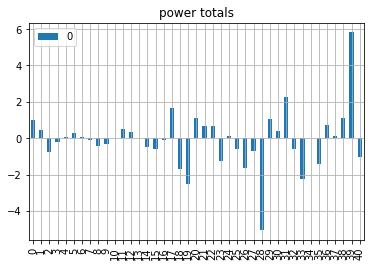

In [37]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(Monthly_power.total))
x_acf.plot(kind='bar')
plt.grid()
plt.title("power totals")

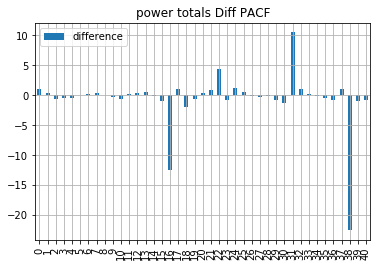

In [38]:

Monthly_power['diff_1'] = Monthly_power['total'] - Monthly_power['total'].shift()


x_acf = pd.DataFrame(pacf(Monthly_power.diff_1[1:]))
x_acf.plot(kind='bar')
plt.grid()
plt.title("power totals Diff PACF")
plt.legend(['difference'])

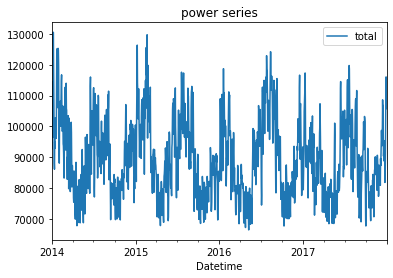

total
Datetime                 
2014-01-01   92734.173913
2014-01-02  103386.625000
2014-01-03  114307.000000
2014-01-04  107467.666667
2014-01-05   96549.291667

In [26]:
Daily_power=pd.DataFrame()

Daily_power['total'] = power['total'].resample('D').mean()
Daily_power.plot()
plt.title('power series')
plt.show()
Daily_power.head()

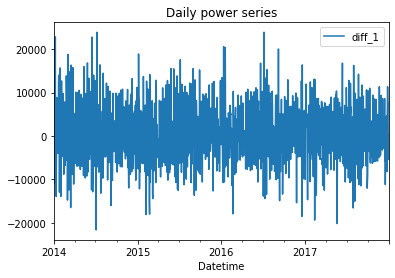

total        diff_1
Datetime                               
2014-01-01   92734.173913           NaN
2014-01-02  103386.625000  10652.451087
2014-01-03  114307.000000  10920.375000
2014-01-04  107467.666667  -6839.333333
2014-01-05   96549.291667 -10918.375000

In [30]:
#weekly_power['diff_1'] = weekly_power['total'] - weekly_power['total'].shift(periods=52)
Daily_power['diff_1'] = Daily_power['total'] - Daily_power['total'].shift()

Daily_power.plot(y='diff_1')
plt.title('Daily power series')
plt.show()
Daily_power.head()


Text(0.5, 1.0, 'Daily power totals')

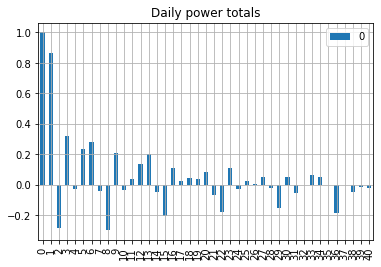

In [41]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(Daily_power.total))
x_acf.plot(kind='bar')
plt.grid()
plt.title("Daily power totals")


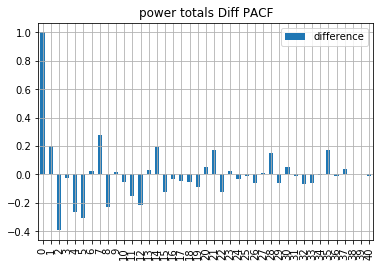

In [31]:
Daily_power['diff_1'] = Daily_power['total'] - Daily_power['total'].shift()


x_acf = pd.DataFrame(pacf(Daily_power.diff_1[1:]))
x_acf.plot(kind='bar')
plt.grid()
plt.title("power totals Diff PACF")
plt.legend(['difference'])

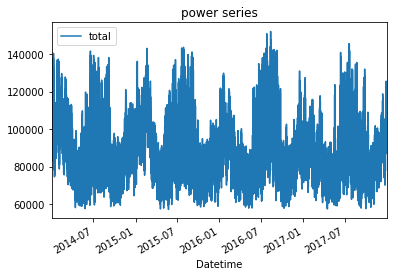

total
Datetime                    
2014-12-31 01:00:00  92816.0
2014-12-31 02:00:00  90819.0
2014-12-31 03:00:00  90194.0
2014-12-31 04:00:00  90387.0
2014-12-31 05:00:00  92148.0

In [32]:
hourly_power=pd.DataFrame()

hourly_power['total'] = power['total']#.resample('D').mean()
hourly_power.plot()
plt.title('power series')
plt.show()
hourly_power.head()

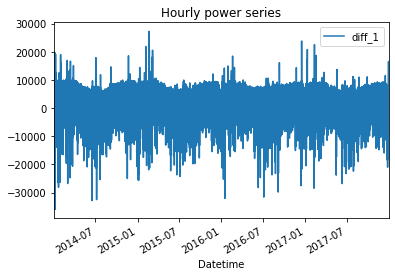

total  diff_1
Datetime                            
2014-12-31 01:00:00  92816.0     NaN
2014-12-31 02:00:00  90819.0 -1997.0
2014-12-31 03:00:00  90194.0  -625.0
2014-12-31 04:00:00  90387.0   193.0
2014-12-31 05:00:00  92148.0  1761.0

In [33]:
#weekly_power['diff_1'] = weekly_power['total'] - weekly_power['total'].shift(periods=52)
hourly_power['diff_1'] = hourly_power['total'] - hourly_power['total'].shift()

hourly_power.plot(y='diff_1')
plt.title('Hourly power series')
plt.show()
hourly_power.head()


Text(0.5, 1.0, 'Hourly power totals')

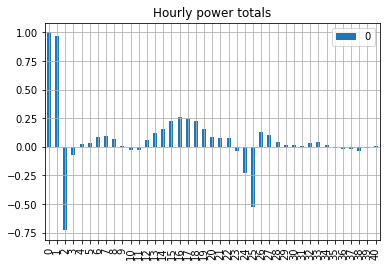

In [42]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(hourly_power.total))
x_acf.plot(kind='bar')
plt.grid()
plt.title("Hourly power totals")

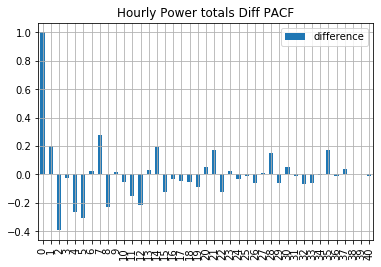

In [43]:
Daily_power['diff_1'] = Daily_power['total'] - Daily_power['total'].shift()


x_acf = pd.DataFrame(pacf(Daily_power.diff_1[1:]))
x_acf.plot(kind='bar')
plt.grid()
plt.title("Hourly Power totals Diff PACF")
plt.legend(['difference'])

In [11]:
from numpy.fft import fft, fftfreq, ifft 
Monthly_power = power['PJME']

transform = fft(Monthly_power)
#print (Monthly_power.count())
print(transform)
#transform.plot()

[ 1.09652351e+09      +0.j         -1.45923346e+07-4676746.65729674j
  3.20086262e+06-1206135.483445j   ... -6.74838819e+06-1842919.16860838j
  3.20086262e+06+1206135.483445j   -1.45923346e+07+4676746.65729674j]


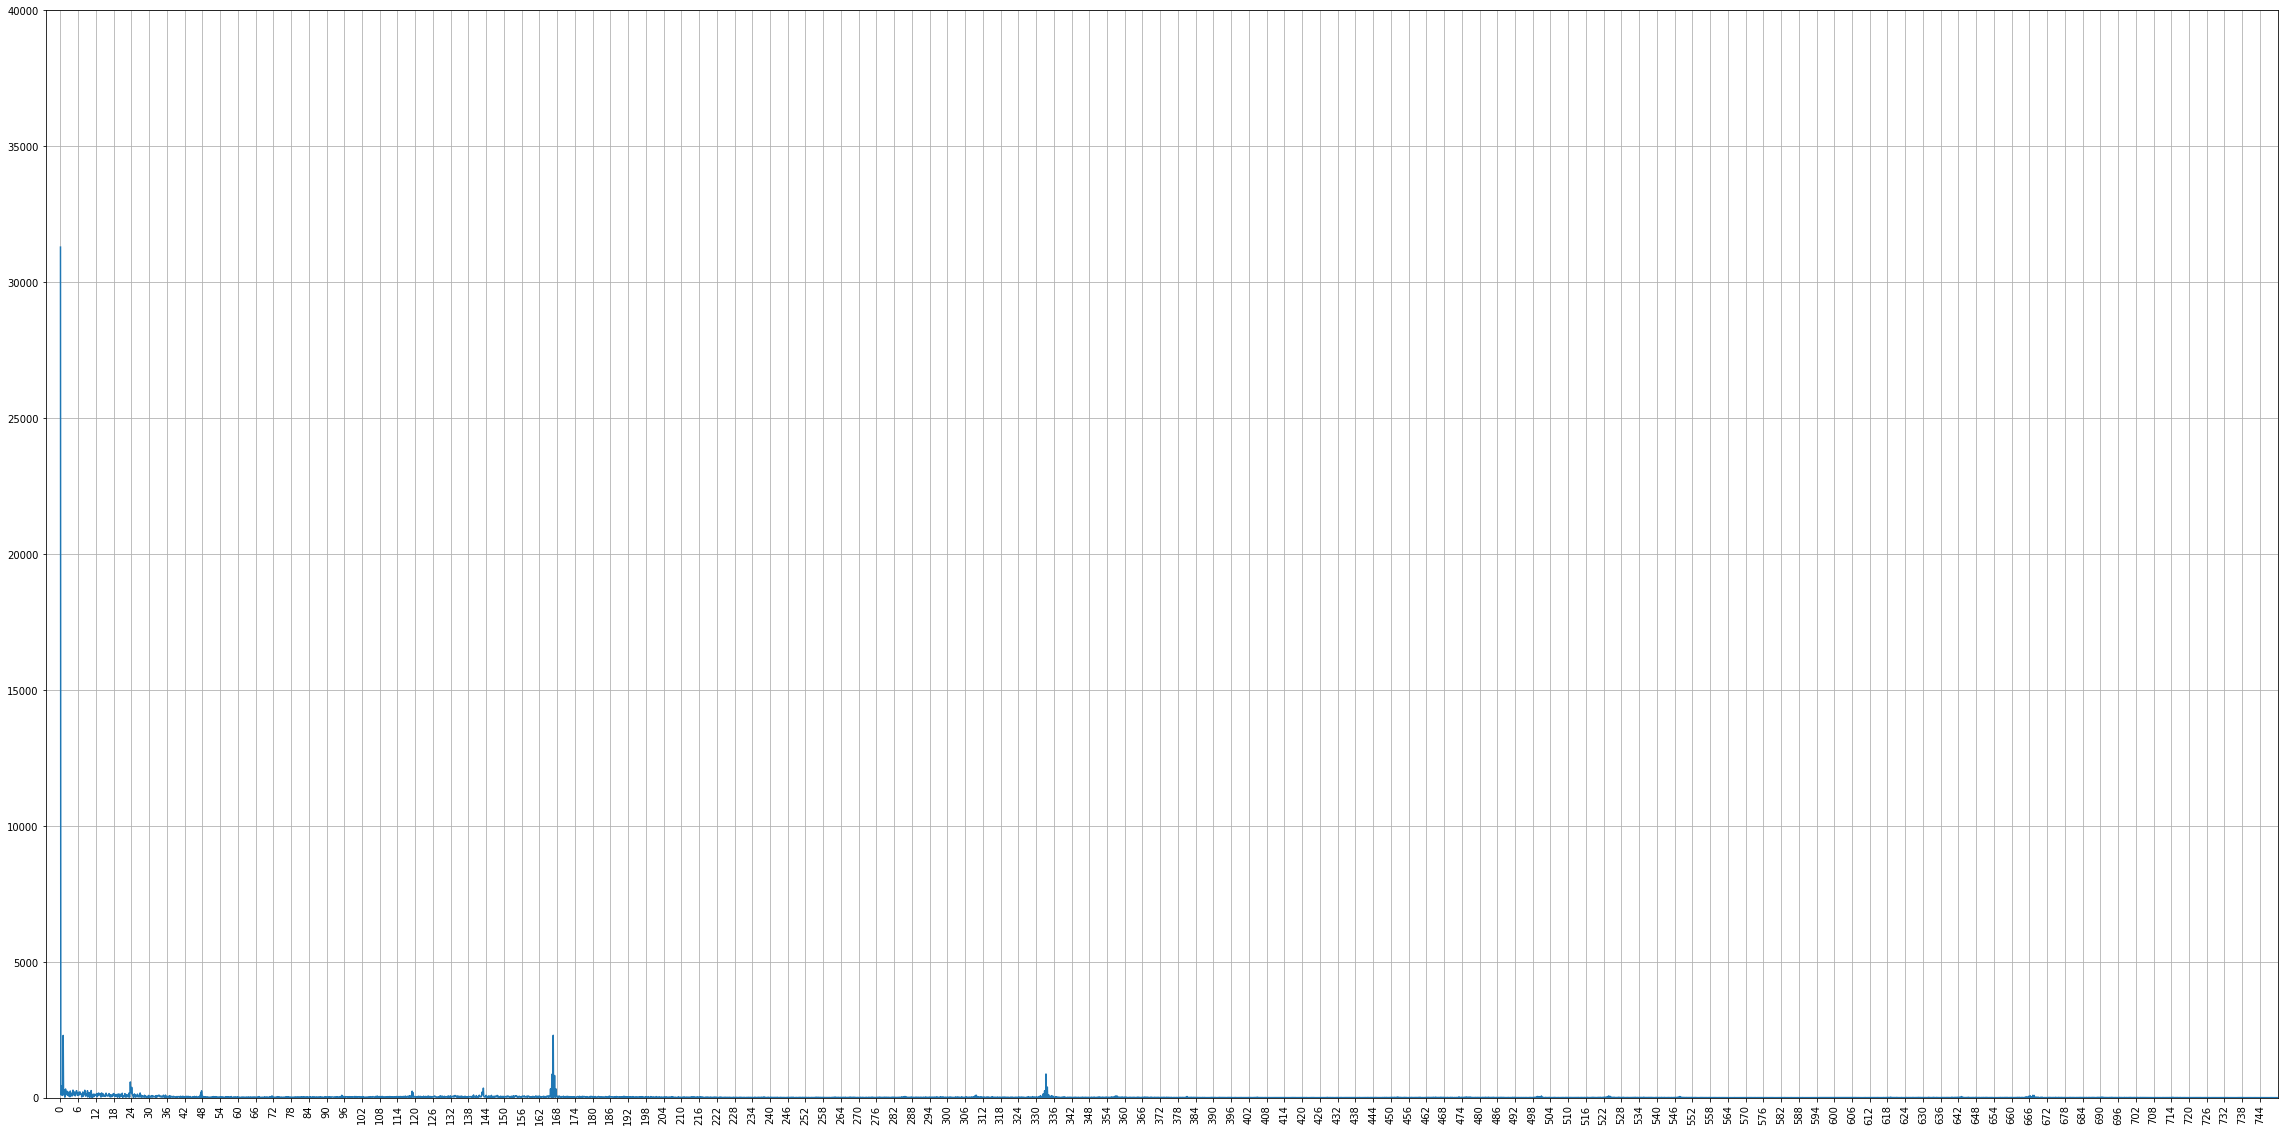

In [12]:
from numpy.fft import fft, fftfreq, ifft 

#from scipy.fft import fft
# Number of sample points
N = 35040
# sample spacing
#T = 1.0 / 20
T = 1.0 / 4000

x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(Monthly_power)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 1.0/N * np.abs(yf[0:N//2]))

#plt.plot(N, yf)

#plt.xlim(1500,2000)
plt.xlim(-5,750)
plt.xticks(np.arange(0, 750, step=6),rotation=90)
plt.ylim(0,40000)

plt.grid()
plt.show()

In [63]:
#24 hours in a day 
#168 hours in a week 
#730 hours in a month 
#17472 hours in a year 

for i in range(1,5):
    print(i*168)

168
336
504
672


In [64]:
from numpy.fft import fft, fftfreq, ifft 

#from scipy.fft import fft
# Number of sample points
N = 35040
# sample spacing
#T = 1.0 / 20
T = 1.0 / 4000

x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(Monthly_power)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.figure(figsize=(400,200))
#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 1.0/N * np.abs(yf[0:N//2]))

#plt.plot(N, yf)

#plt.xlim(1500,2000)
plt.xlim(-5,19000)
plt.xticks(np.arange(0, 19000, step=6),rotation=90)
plt.ylim(0,40000)

plt.grid()
plt.show()

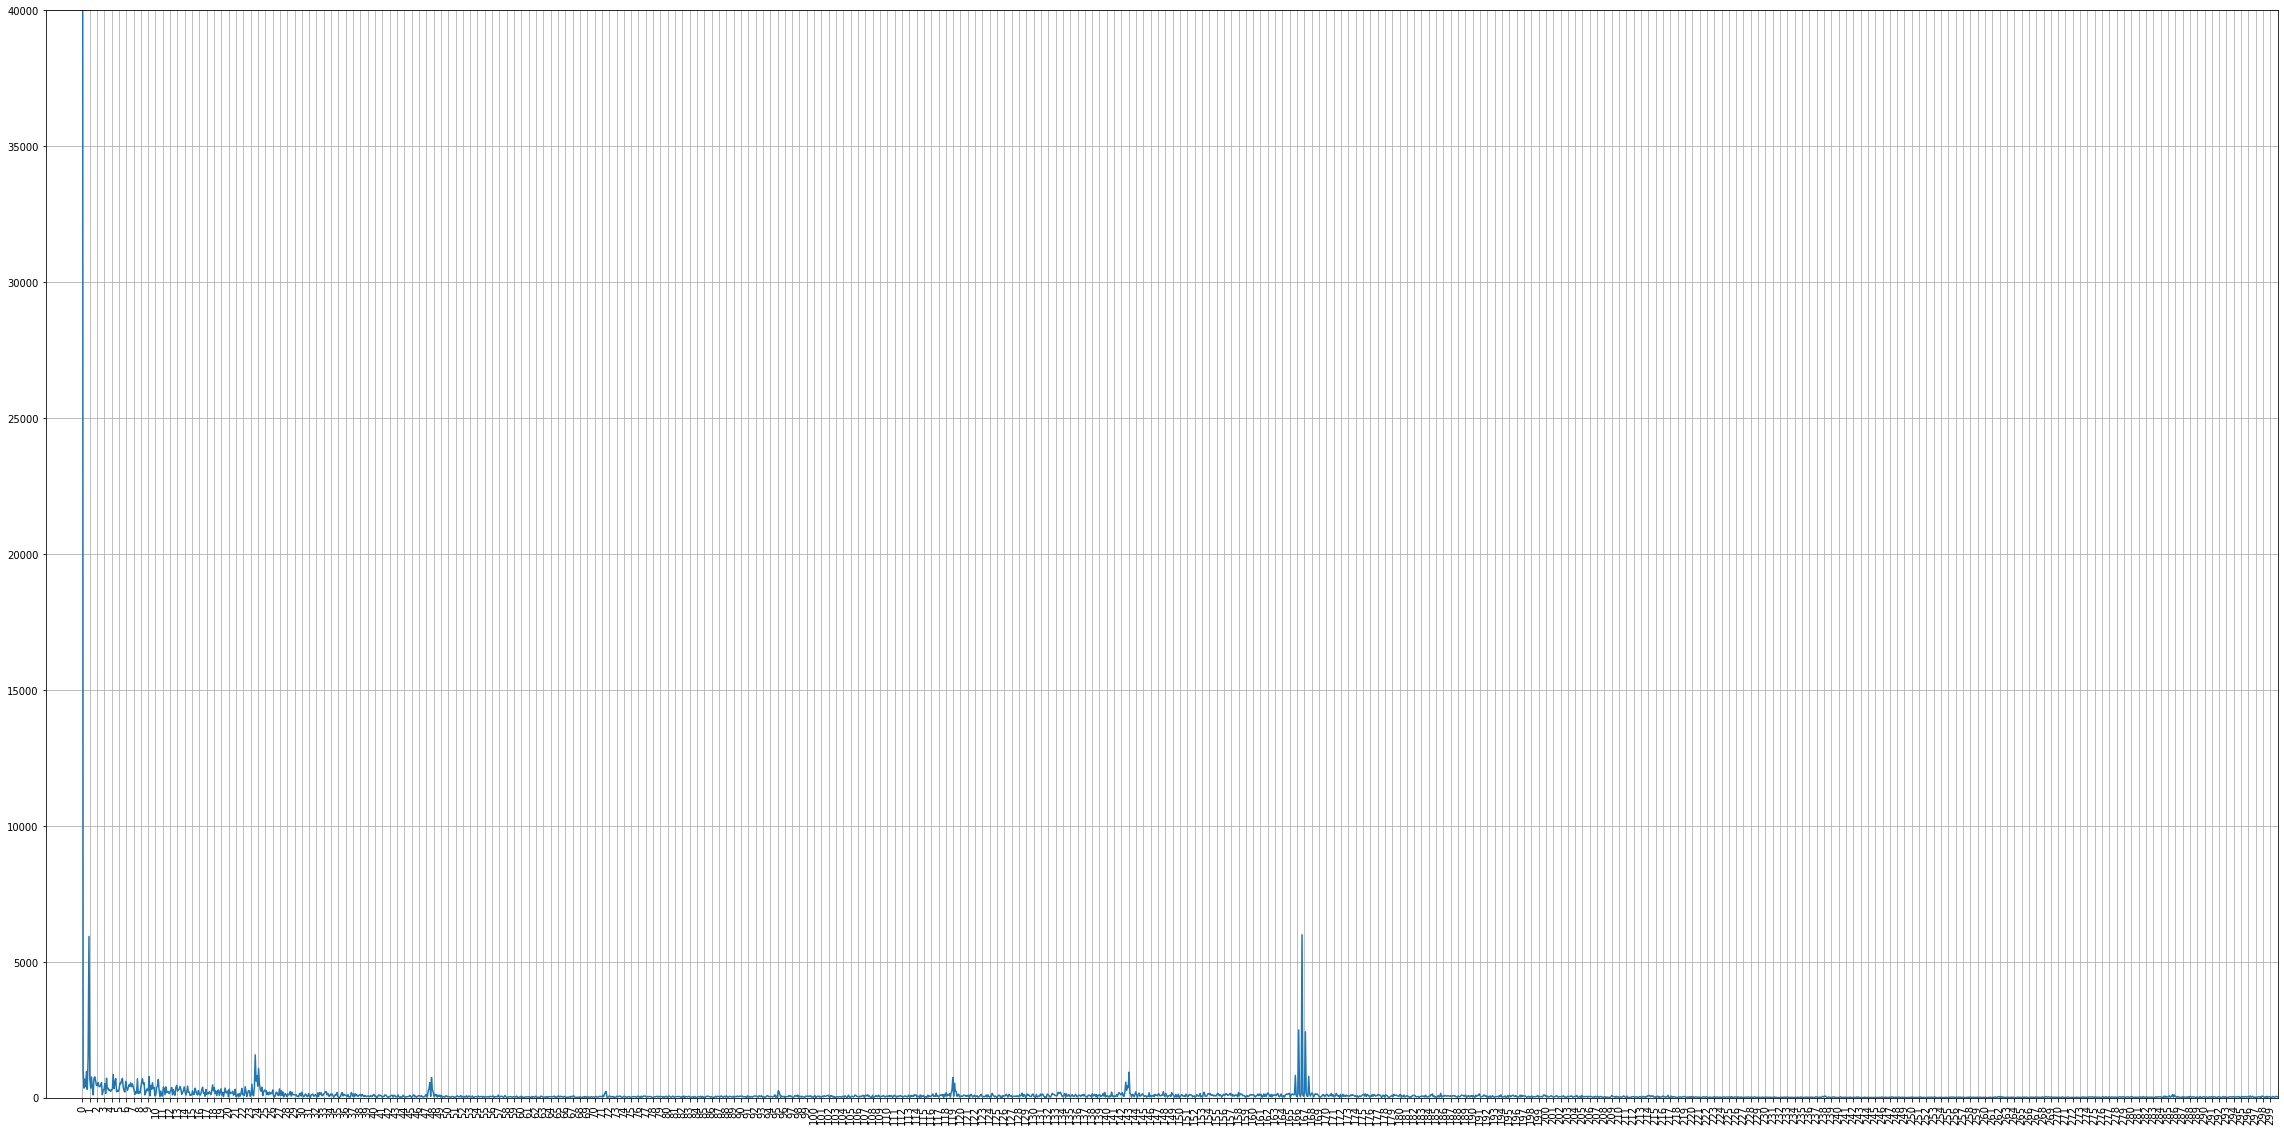

In [66]:
from numpy.fft import fft, fftfreq, ifft 

#from scipy.fft import fft
# Number of sample points
N = 35040
# sample spacing
#T = 1.0 / 20
T = 1.0 / 4000

x = np.linspace(0.0, N*T, N)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(Monthly_power)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
#plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.plot(xf, 1.0/N * np.abs(yf[0:N//2]))

#plt.plot(N, yf)

#plt.xlim(1500,2000)
plt.xlim(-5,300)
plt.xticks(np.arange(0, 300, step=1),rotation=90)
plt.ylim(0,40000)

plt.grid()
plt.show()

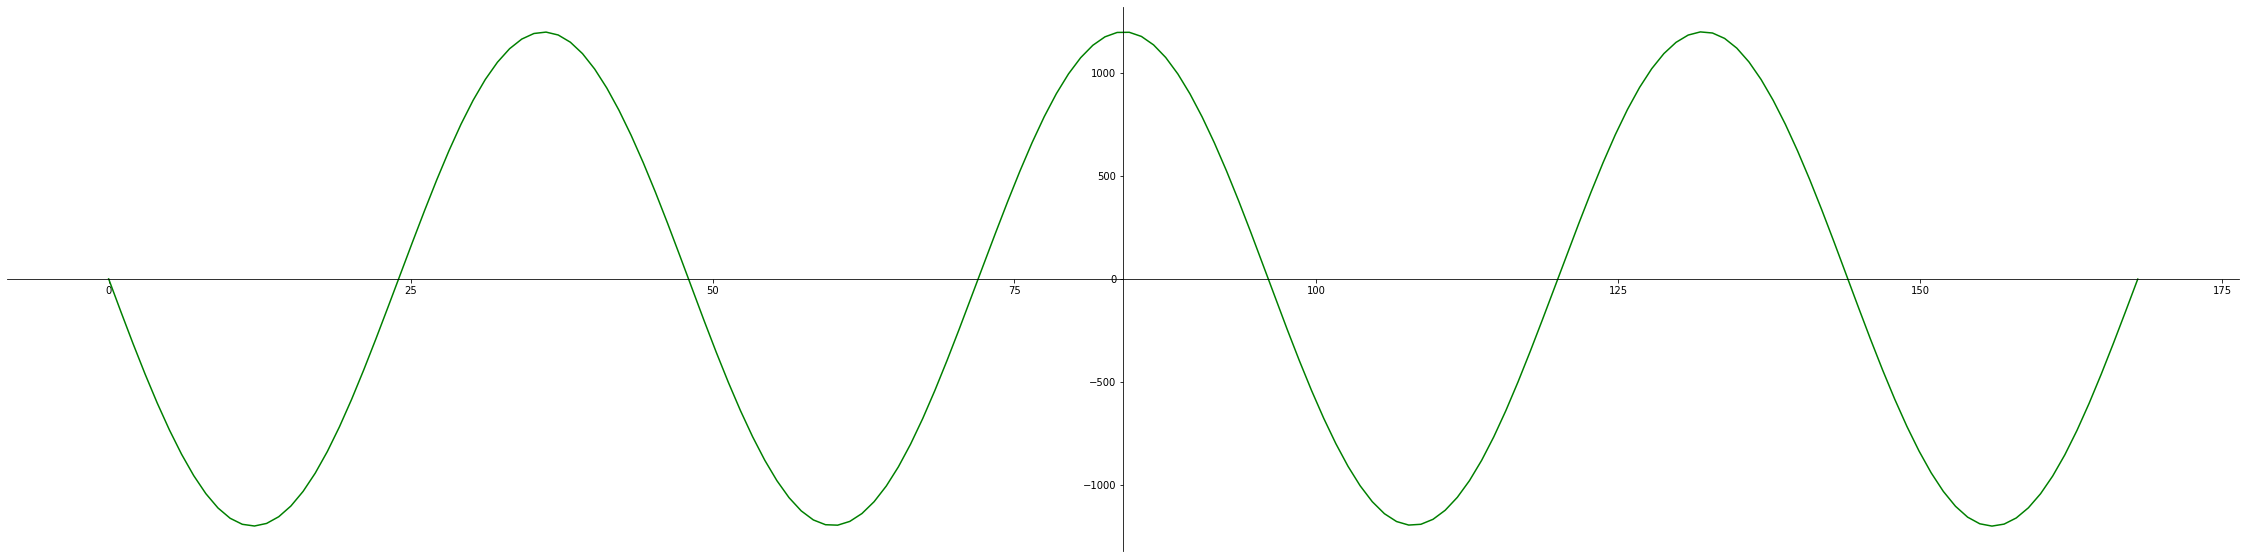

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import math
# 100 linearly spaced numbers
x = np.linspace(0,168,168)

#seasonal variables


# the function, which is y = x^3 here
y1 = np.sin(math.pi*((x/4)-3))
y2 = np.sin(math.pi*((x/24)-3))*1200
y3 = np.sin(math.pi*((x/34)-3))
y4 = np.sin(math.pi*((x/66)-3))
y5 = np.sin(math.pi*(((x-3)/168)))



y=y1+y2+y3+y4+y5
# setting the axes at the centre
fig = plt.figure(figsize = (40,10))
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'g')
#plt.xscale(168)
# show the plot
plt.show()

In [229]:
# import sympy  
from numpy.fft import fft, fftfreq, ifft 
Monthly_power = power.resample('M').mean()
n = Monthly_power.DatetimeIndex.size
# sequence  
seq = Monthly_power['total'] 
  
# fft 

#transform = fft(seq)
freq = fftfreq(n) 
fft_vals = fft(seq)
fft_theo=2.0*np.abs(fft_vals/seq.index)
#print (transform) 

AttributeError: 'DataFrame' object has no attribute 'DatetimeIndex'

In [154]:
plt.plot(freq,fft_theo)

AttributeError: 'list' object has no attribute 'plot'

In [57]:

import itertools
p = d = q = range(0, 5)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 24) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 24)
SARIMAX: (0, 0, 1) x (0, 0, 2, 24)
SARIMAX: (0, 0, 2) x (0, 0, 3, 24)
SARIMAX: (0, 0, 2) x (0, 0, 4, 24)


In [ ]:
https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html

In [694]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO
# Register converters to avoid warnings
pd.plotting.register_matplotlib_converters()

In [74]:
y = power['total']#.resample('M').mean()
y.head()

Datetime
2014-12-31 01:00:00    92816.0
2014-12-31 02:00:00    90819.0
2014-12-31 03:00:00    90194.0
2014-12-31 04:00:00    90387.0
2014-12-31 05:00:00    92148.0
Name: total, dtype: float64

In [721]:


# Fit the model
mod = sm.tsa.statespace.SARIMAX(y, trend='c', order=(1,0,1))
res = mod.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  total   No. Observations:                35040
Model:               SARIMAX(1, 0, 1)   Log Likelihood             -331990.988
Date:                Wed, 29 Apr 2020   AIC                         663989.977
Time:                        11:50:59   BIC                         664023.834
Sample:                             0   HQIC                        664000.760
                              - 35040                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1267.4359    185.894      6.818      0.000     903.089    1631.782
ar.L1          0.9850      0.002    490.329      0.000       0.981       0.989
ma.L1          0.5545      0.003    176.340      0.000       0.548       0.561
sigma2       1.15e+07      0.181   6.36e+07      0.000    1.15e+07    1.15e+07
===================================================================================
Ljung-Box (Q):                    78379.17   Jarque-Bera (JB):            102493.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                            -0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.58e+26. Standard errors may be unstable.
"""

Residuals Description


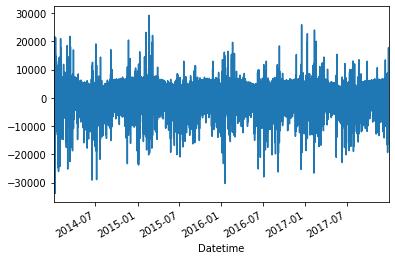

In [722]:
print('Residuals Description')
res.resid.describe()
res.resid.plot()


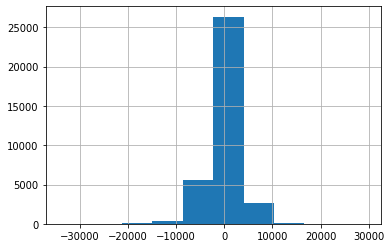

In [723]:
res.resid.hist()

In [75]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(y, order=(1,0,1), seasonal_order=(1,0,1,168), simple_differencing=True)
res = mod.fit(disp=False)
res.summary()

KeyboardInterrupt: 

Residuals Description
count    35040.000000
mean        99.243410
std       1960.943628
min     -40152.558940
25%       -658.527999
50%        122.622558
75%        893.882513
max      92816.000000
dtype: float64


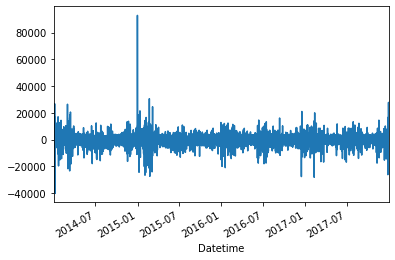

In [725]:
print('Residuals Description')
print(res.resid.describe())
res.resid.plot()


In [720]:
https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_sarimax_stata.html

SyntaxError: invalid syntax (<ipython-input-720-0f8dd92965ea>, line 1)

In [703]:
y = power.resample('M').mean()
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 2))#,
                                #seasonal_order=(0, 1, 4, 12))
                                #,enforce_stationarity=False)
#,enforce_invertibility=False)
results = mod.fit()
results.summary()

ValueError: Invalid value for design matrix. Requires a 2- or 3-dimensional array, got 1 dimensions

In [696]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                35040
Model:             SARIMAX(0, 1, 2)x(0, 1, 4, 12)   Log Likelihood                     nan
Date:                            Tue, 28 Apr 2020   AIC                                nan
Time:                                    08:48:44   BIC                                nan
Sample:                                         0   HQIC                               nan
                                          - 35040                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1      -6.618e+07   3.22e-08  -2.06e+15      0.000   -6.62e+07   -6.62e+07
ma.L2       -6.53e+07   6.31e-14  -1.04e+21      0.000   -6.53e+07   -6.53e+07
ma.S.L12    3.542e+04      0.000   2.36e+08      0.000    3.54e+04    3.54e+04
ma.S.L24   -6.319e+04      0.000  -1.71e+08      0.000   -6.32e+04   -6.32e+04
ma.S.L36    5.178e+04      0.000   2.93e+08      0.000    5.18e+04    5.18e+04
ma.S.L48   -6.295e+04      0.000  -2.25e+08      0.000   -6.29e+04   -6.29e+04
sigma2         0.2182   1.12e-09   1.96e+08      0.000       0.218       0.218
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):       12951019963.64
Prob(Q):                               nan   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                           -10.42
Prob(H) (two-sided):                  0.00   Kurtosis:                      2984.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.1e+20. Standard errors may be unstable.
"""

In [697]:

print(results)

the above shows increments of weeks 

the first differnce is 


p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.

In [699]:
training = power.resample('M').mean()
training.head()

AEP         COMED       DAYTON         DEOK           DOM          DUQ         EKPC           FE   NI          PJME         PJMW  PJM_Load          total
Datetime                                                                                                                                                                      
2014-01-31  18452.721400  12865.257066  2386.594886  3637.207268  13455.223419  1858.562584  2129.923284  8940.530283  0.0  36694.063257  7011.109017       0.0  107431.192463
2014-02-28  17398.461310  12432.812500  2279.882440  3438.687500  12217.985119  1809.985119  1868.587798  8855.370536  0.0  34801.150298  6616.827381       0.0  101719.750000
2014-03-31  15735.546433  11296.674293  2027.803499  3041.647376  11355.911171  1690.756393  1565.460296  8184.092867  0.0  32360.328398  6081.919246       0.0   93340.139973
2014-04-30  13338.630556  10047.816667  1745.068056  2658.233333   9083.747222  1500.365278  1184.600000  7165.013889  0.0  27300.355556  4977.568056       0.0   79001.398611
2014-05-31  13533.248656  10413.401882  1812.255376  2885.068548   9821.220430  1530.318548  1249.584677  7187.258065  0.0  27235.440860  4898.639785       0.0   80566.436828

In [69]:
from statsmodels.tsa.statespace import sarimax
# order refers to p d and q
# p = order of autoregression
# d = difference
# q = order of the moving averages
training = power.resample('M').mean()
#model = SARIMAX(power.total, order=(0,0,2),seasonal_order=(0, 0, 4, 12) )
model = SARIMAX(power.total, order=(0,0,0),seasonal_order=(0, 0, 0, 12) )

model_fit = model.fit(training )
model_fit.summary()


NameError: name 'SARIMAX' is not defined

In [ ]:
print('Residuals Description')
model_fit.resid.describe()
model_fit.resid.plot()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
# order refers to p d and q
# p = order of autoregression
# d = difference
# q = order of the moving averages

model = ARIMA(power.total, order=(5,0,5))
model_fit = model.fit(power['total'] )
model_fit.summary()


In [15]:
print('Residuals Description')
model_fit.resid.describe()

Residuals Description


count    35040.000000
mean        -0.120342
std       2532.209127
min     -29658.733687
25%      -1206.138310
50%        -58.296280
75%       1213.991063
max      30432.984709
dtype: float64

# Anual seasonality  

In [16]:




#test = pd.DataFrame()
#test = power.groupby([power.index.month, power.index.day]).mean()
#plt.plot(test)


power.head()

power.head()



AEP    COMED  DAYTON    DEOK      DOM     DUQ    EKPC      FE   NI     PJME    PJMW  PJM_Load    total  diff_1
Datetime                                                                                                                               
2014-12-31 01:00:00  15993.0  11633.0  1912.0  3067.0  12337.0  1562.0  1882.0  7547.0  0.0  30795.0  6088.0       0.0  92816.0     NaN
2014-12-31 02:00:00  15780.0  11139.0  1875.0  3024.0  12267.0  1550.0  1845.0  7334.0  0.0  29995.0  6010.0       0.0  90819.0 -1997.0
2014-12-31 03:00:00  15769.0  10871.0  1866.0  3021.0  12345.0  1545.0  1902.0  7196.0  0.0  29688.0  5991.0       0.0  90194.0  -625.0
2014-12-31 04:00:00  15738.0  10735.0  1883.0  3031.0  12589.0  1546.0  1894.0  7153.0  0.0  29767.0  6051.0       0.0  90387.0   193.0
2014-12-31 05:00:00  15993.0  10714.0  1910.0  3111.0  13046.0  1539.0  1927.0  7305.0  0.0  30426.0  6177.0       0.0  92148.0  1761.0

In [17]:
train_start_date='2014-01-01 00:00:00'
train_end_date='2017-01-01 00:00:00'




print(len(power['total'].resample('Y').sum()))
#power.tail(400)

4


Coefficients: [-4.83660512e-98  5.32499383e-96  7.90585105e-93 -7.84390670e-92
 -4.17232690e-88 -8.15072720e-86  6.58499071e-85  4.02561950e-81
  1.06295220e-78  1.11682917e-76 -1.73094768e-74 -1.03233705e-71
 -2.28346289e-69 -2.08524010e-67  4.31583058e-65  2.28737818e-62
  4.94702065e-60  4.32616706e-58 -1.00713630e-55 -5.04262423e-53
 -1.02309824e-50 -6.27198559e-49  3.00324877e-46  1.14302399e-43
  1.73553233e-41 -7.51982532e-40 -1.01623695e-36 -2.16635231e-34
 -2.74965174e-33  9.72323496e-30  2.11917705e-27 -7.61104932e-26
 -1.14284438e-22 -1.13908639e-20  4.44152421e-18  8.01259072e-16
 -2.15560361e-13 -2.61207500e-11  1.45383525e-08 -2.40002426e-06
  2.26801953e-04 -1.38214777e-02  5.59994234e-01 -1.49540692e+01
  2.52724420e+02 -2.48961943e+03  1.22369267e+04 -2.26516161e+04
  1.10725226e+05]


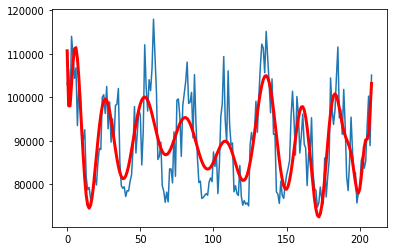

In [177]:

from matplotlib import pyplot
from numpy import polyfit
series1 = power['total']
series =power['total'].resample('W').mean()
# fit polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%209 for i in range(0, len(series))]
#X = [for i in range(0, len(series))]

y = series.values
degree =48
coef = polyfit(X, y, degree)
print('Coefficients: %s' % coef)
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
# plot curve over original data
pyplot.plot(series.values)
pyplot.plot(curve, color='red', linewidth=3)
pyplot.show()


# Weekly seaseonality 

In [ ]:
# Daily Oscilations 

In [ ]:
power.groupby(power.index.time).mean().plot();

In [ ]:



plt.plot(power.Datetime, power.PJM_Load)
plt.plot(power.Datetime, power.PJM_Load)
#plt.xticks(rotation=60)
#plt.legend(loc = (.01,.8))
#plt.title('Time Series Linear Plots')
plt.show()

In [59]:

local_max = pd.DataFrame()
# define an aproximate interval to look at
#Aproximate_interval= 
local_maximums = []
last_row = 0
top_row = 0
last_top_row = 0

for index, row in power.iterrows():
        if row['total'] > last_row:
            top_row  = tuple((index,row['total']))
        
        elif row['total'] < last_row:
            local_maximums.append(top_row)
            #if top_row != last_top_row :
             #   local_maximums.append(top_row)
              #  last_top_row = top_row
            #else:
            #    None
        else:
            None 
        last_row = row['total']
        

print(local_maximums)

[(Timestamp('2014-12-31 01:00:00'), 92816.0), (Timestamp('2014-12-31 01:00:00'), 92816.0), (Timestamp('2014-12-31 09:00:00'), 106954.0), (Timestamp('2014-12-31 09:00:00'), 106954.0), (Timestamp('2014-12-31 09:00:00'), 106954.0), (Timestamp('2014-12-31 09:00:00'), 106954.0), (Timestamp('2014-12-31 09:00:00'), 106954.0), (Timestamp('2014-12-31 09:00:00'), 106954.0), (Timestamp('2014-12-31 09:00:00'), 106954.0), (Timestamp('2014-12-31 19:00:00'), 110949.0), (Timestamp('2014-12-31 19:00:00'), 110949.0), (Timestamp('2014-12-31 19:00:00'), 110949.0), (Timestamp('2014-12-31 19:00:00'), 110949.0), (Timestamp('2014-12-31 19:00:00'), 110949.0), (Timestamp('2014-12-31 19:00:00'), 110949.0), (Timestamp('2014-12-31 19:00:00'), 110949.0), (Timestamp('2014-12-31 19:00:00'), 110949.0), (Timestamp('2014-12-30 10:00:00'), 103007.0), (Timestamp('2014-12-30 10:00:00'), 103007.0), (Timestamp('2014-12-30 10:00:00'), 103007.0), (Timestamp('2014-12-30 10:00:00'), 103007.0), (Timestamp('2014-12-30 10:00:00'), 

In [88]:
local_max = pd.DataFrame(local_maximums, columns =['Datetime','total']) 
local_max['Datetime'] = pd.to_datetime(local_max['Datetime'])

#local_max['Datetime'] = local_max['Datetime'].strptime(str(local_max['Datetime']), '%Y%m%d%H%M%S')
    
#,format = '%Y%m%d%H%M%S'


local_max['time_delta'] = local_max['Datetime'] - local_max['Datetime'].shift()

local_max = local_max.dropna()
print("count = {}".format(len(local_max)))
print(local_max.describe())
local_max.info()
local_max.head()

count = 18080
               total              time_delta
count   18080.000000                   18080
mean   101920.858462  0 days 00:58:21.637168
std     16888.259038  9 days 09:30:39.597636
min     57749.000000       -2 days +03:00:00
25%     88804.000000         0 days 00:00:00
50%     98777.000000         0 days 00:00:00
75%    113926.000000         0 days 00:00:00
max    152178.000000       729 days 06:00:00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18080 entries, 1 to 18080
Data columns (total 3 columns):
Datetime      18080 non-null datetime64[ns]
total         18080 non-null float64
time_delta    18080 non-null timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), timedelta64[ns](1)
memory usage: 565.0 KB


Datetime     total time_delta
1 2014-12-31 01:00:00   92816.0   00:00:00
2 2014-12-31 09:00:00  106954.0   08:00:00
3 2014-12-31 09:00:00  106954.0   00:00:00
4 2014-12-31 09:00:00  106954.0   00:00:00
5 2014-12-31 09:00:00  106954.0   00:00:00

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

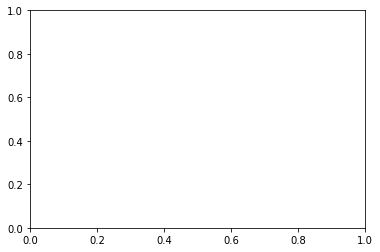

In [89]:
pd.plotting.register_matplotlib_converters()

#local_max = local_max.dropna()
plt.hist(local_max['time_delta'])

#plt.xlim([0,96 ])

datetime(2013, 1, 3)


In [46]:
power_for_prophet= pd.DataFrame()
power_for_prophet[['ds','y']] = power['total'].reset_index()


In [47]:



train_start_date='2014-01-01 00:00:00'
train_end_date='2017-01-01 00:00:00'

test_start_date='2017-01-01 00:00:00'
test_end_date='2017-12-31 00:00:00'


train_mask = (power_for_prophet['Datetime'] > train_start_date) & (power_for_prophet['Datetime'] <= train_end_date)

test_mask = (power_for_prophet['Datetime'] > test_start_date) & (power_for_prophet['Datetime'] <= test_end_date)

X_train = pd.DataFrame()
X_test = pd.DataFrame()
y_test = pd.DataFrame()

X_train = power_for_prophet.loc[train_mask]

X_test = power_for_prophet[['ds','y']].loc[test_mask]
y_test = power_for_prophet[['ds','y']].loc[test_mask]


power_for_prophet.head()

KeyError: 'Datetime'

In [93]:
# Python
m = Prophet()
m.fit(X_train)

In [109]:
X_test.head()

ds         y
26304 2017-12-30 01:00:00  100547.0
26305 2017-12-30 02:00:00   98032.0
26306 2017-12-30 03:00:00   96608.0
26307 2017-12-30 04:00:00   96148.0
26308 2017-12-30 05:00:00   96654.0

In [113]:
m.predict()

# Python
forecast = m.predict(X_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds           yhat    yhat_lower     yhat_upper
8731 2017-12-30 20:00:00  114058.191499  37865.615101  188693.255252
8732 2017-12-30 21:00:00  112108.923555  38572.919783  186699.231562
8733 2017-12-30 22:00:00  108154.640615  32691.313782  184246.861951
8734 2017-12-30 23:00:00  102826.397901  28837.198280  177968.608191
8735 2017-12-31 00:00:00   97176.735277  23262.987006  173307.417759

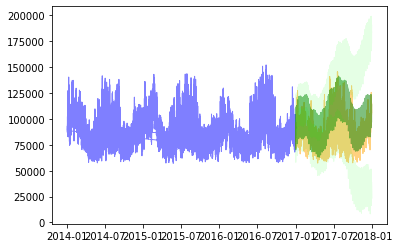

In [120]:
#fig1 = m.plot(forecast)

pyplot.plot(X_train.ds,X_train.y, color='blue',alpha=0.5, linewidth=1)
pyplot.plot(X_test.ds,X_test.y, color='orange',alpha=0.5, linewidth=1)
pyplot.plot(forecast.ds,forecast.yhat,color='green',alpha=0.5,linewidth=1)
pyplot.plot(forecast.ds,forecast.yhat_lower,color='lime',alpha=0.1,linewidth=1)
pyplot.plot(forecast.ds,forecast.yhat_upper,color='lime',alpha=0.1,linewidth=1)


pyplot.show()

dark sky 
https://darksky.net/forecast/40.7127,-74.0059/us12/en

open weather
https://openweathermap.org/history



https://github.com/weatherbit/weatherbit-python 
